# Machine Learning

Information that helped me with machine learning. (Not a comprehensive tutorial.)

## Step 1. Developing in Python

### VS Code

* Text editor, not an IDE.

* Marketplace of extensions that provide language-specific behavior.

### Python

* Interpreted language for data scientists. Slow but very flexible. Perfect for torturing actual software developers.

* "Virtual environments" instead of projects, using `pip` to manage packages.

### Jupyter

* Code + markdown = executable documentation.

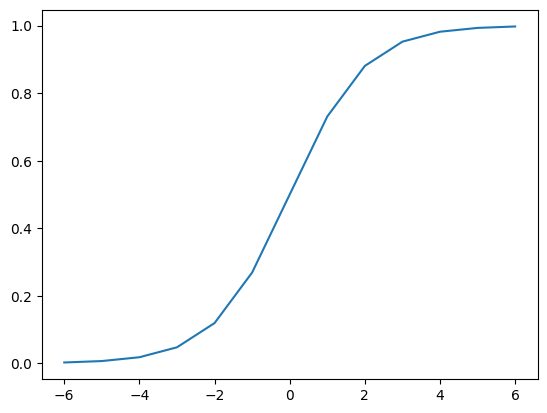

In [109]:
import math
import matplotlib.pyplot as plt

x = [-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6]
y = [1/(1+math.exp(-z)) for z in x]   # sigmoid function

plt.plot(x,y)
plt.show()

![](https://www.gstatic.com/education/formulas2/553212783/en/sigmoid_function.svg)

## Step 2. PyTorch

* Open source machine learning framework from Meta.

* Becoming more popular than Google's Tensorflow.

* Can run on either CPU (slow) or GPU (fast, called "CUDA").

In [110]:
import torch

print(torch.__version__)

2.0.1+cpu


## Step 3. Tensors

**A tensor is an N-dimensional array.**

<img src="https://miro.medium.com/1*6Z892ClZGon03_Mawj4Pew.png" width="400"/>

### 0-dimensional tensor

Also known as a scalar. Here we create a tensor from a single numeric value:

In [ ]:
ndim0 = torch.tensor(3.1415)
print(ndim0)

### 1-dimensional tensor

Also known as a vector. We can create a tensor from a Python list:

In [ ]:
ndim1 = torch.tensor([1, 2, 4, 8, 16, 32])
print(ndim1)

(Note: A vector can also be considered as a position in N-dimensional space. Both interpretations are valid, but don't get them mixed up.)

### 2-dimensional tensor

Also known as a matrix, which is essentially a table of rows and columns. Here, we generate a 1D tensor of 12 integers, and then change its shape:

In [32]:
range = torch.arange(0, 12)
ndim2 = range.view(3, 4)   # 3 rows by 4 columns
print(ndim2)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


Note that ranges in Python are [inclusive, exclusive).

We can modify the data in the tensor:

In [33]:
ndim2[1,0] = -100
print(ndim2)

tensor([[   0,    1,    2,    3],
        [-100,    5,    6,    7],
        [   8,    9,   10,   11]])


Note that the view shares its data with the original tensor:

In [111]:
print(range)

tensor([   0,    1,    2,    3, -100,    5,    6,    7,    8,    9,   10,   11])


We can also transpose a tensor's rows and columns:

In [115]:
print(ndim2.transpose(0, 1))   # transpose dim-0 and dim-1

tensor([[   0,    1,    2,    3],
        [-100,    5,    6,    7],
        [   8,    9,   10,   11]])


### 3-dimensional tensor

In [116]:
ndim3 = torch.rand(2, 3, 4)   # 2 layers X 3 rows X 4 columns
print(ndim3)

tensor([[[0.6263, 0.8852, 0.4303, 0.9129],
         [0.0803, 0.3661, 0.6695, 0.3881],
         [0.9072, 0.7702, 0.4240, 0.9634]],

        [[0.7131, 0.9420, 0.0688, 0.8673],
         [0.6058, 0.4113, 0.1891, 0.6410],
         [0.9686, 0.0151, 0.5488, 0.3222]]])


### Higher dimensions

It gets harder to visualize tensors as the number of dimensions increases:

In [4]:
ndim4 = torch.rand(2, 3, 2, 3)   # 2 hyperlayers X 3 layers X 2 rows X 3 columns
print(ndim4)

tensor([[[[0.7281, 0.7529, 0.1245],
          [0.6339, 0.2286, 0.2368]],

         [[0.9929, 0.9212, 0.8524],
          [0.6799, 0.3778, 0.1866]],

         [[0.3347, 0.5536, 0.4908],
          [0.1231, 0.6237, 0.3349]]],


        [[[0.0228, 0.9878, 0.0744],
          [0.9524, 0.7965, 0.8330]],

         [[0.0393, 0.2747, 0.4127],
          [0.7570, 0.3762, 0.6800]],

         [[0.9239, 0.4075, 0.3881],
          [0.8620, 0.8331, 0.7973]]]])


### Changing dimensionality

Start with a 1D vector:

In [164]:
vector = torch.arange(-4, 5)   # 1D: 9 columns
print(vector)
print(vector.shape)

tensor([-4, -3, -2, -1,  0,  1,  2,  3,  4])
torch.Size([9])


If we insert a dimension of size 1 in front, the columns stay columns:

In [166]:
unsq0 = vector.unsqueeze(0)   # 2D: 1 row x 9 columns
print(unsq0)
print(unsq0.shape)

tensor([[-4, -3, -2, -1,  0,  1,  2,  3,  4]])
torch.Size([1, 9])


If we insert a dimension of size 1 at the end, the columns become rows:

In [167]:
unsq1 = vector.unsqueeze(1)   # 2D: 9 rows x 1 column
print(unsq1)
print(unsq1.shape)

tensor([[-4],
        [-3],
        [-2],
        [-1],
        [ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4]])
torch.Size([9, 1])


## Step 4. Neural network building blocks

Some examples from the "nn" zoo:

In [28]:
from torch import nn

* In general, these are functions of type `Tensor -> Tensor`, so a complex neural network can be built by composition.

* During training, the model learns the best values for the parameters inside these blocks.

### Linear layer

Applies a linear transformation: y = xW<sup>T</sup> + B

Where:
* x is the input tensor
* y is the output tensor
* W is a 2D tensor of weight parameters
* B is a 1D tensor of bias parameters
* xW<sup>T</sup> is matrix multiplication of x by the transpose of W.

In [186]:
linear = nn.Linear(in_features=20, out_features=30)
print("Weight:", linear.weight.shape)
print("Bias:", linear.bias.shape)
print("Total # of parms:", sum(parm.numel() for parm in linear.parameters()))   # (30 x 20) + 30

Weight: torch.Size([30, 20])
Bias: torch.Size([30])
Total # of parms: 630


Linear transforms are useful for "projecting" a tensor into a different shape with the same number of dimensions:

In [187]:
x = torch.rand(5, 6, 20)   # last dimension must match linear input
print("Input:", x.shape)
y = linear(x)              # result is still 3D, but now with 30 columns
print("Output:", y.shape)

Input: torch.Size([5, 6, 20])
Output: torch.Size([5, 6, 30])


### Dropout layer

Randomly sets some of the input to zero during training (and the remaining elements are scaled up proportionally). Dropout prevents the model from becoming too reliant on a small set of parameters.

A dropout layer has no parameters, but its dropout rate (e.g. 20%) is a hyperparameter.

In [67]:
dropout = nn.Dropout(0.2)

x = torch.ones(3, 4)
print(x)
y = dropout(x)
print(y)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1.2500, 1.2500, 0.0000, 1.2500],
        [0.0000, 1.2500, 1.2500, 1.2500],
        [1.2500, 1.2500, 0.0000, 0.0000]])
tensor([[1.2500, 1.2500, 1.2500, 1.2500],
        [1.2500, 0.0000, 1.2500, 1.2500],
        [1.2500, 1.2500, 1.2500, 1.2500]])


The dropout is recomputed during each application, so results are not deterministic:

In [108]:
y = dropout(x)
print(y)

tensor([[1.2500, 1.2500, 1.2500, 1.2500],
        [1.2500, 1.2500, 1.2500, 1.2500],
        [0.0000, 1.2500, 1.2500, 1.2500]])


### Layer normalization

Normalizes input around its mean and standard deviation. This reduces training time by reigning in large values.

In [128]:
numColumns = 4
norm = nn.LayerNorm(numColumns)   # expect last dimension of this size

x = torch.arange(0.0, 12.0).view(-1, numColumns)   # -1: PyTorch infers the # of rows
print(x)
y = norm(x)
print(y)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([[-1.3416, -0.4472,  0.4472,  1.3416],
        [-1.3416, -0.4472,  0.4472,  1.3416],
        [-1.3416, -0.4472,  0.4472,  1.3416]])


The normalization can have weight and bias parameters that the model learns during training:

In [127]:
print("Weight:", norm.weight)
print("Bias:", norm.bias)

Weight: Parameter containing:
tensor([1., 1., 1., 1.], requires_grad=True)
Bias: Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)


### Embedding

asdf

### Activation

asdf

## Building a model

In [225]:
linear = nn.Linear(1, 1)
print(linear.weight)
print(linear.bias)

Parameter containing:
tensor([[-0.7355]], requires_grad=True)
Parameter containing:
tensor([0.8638], requires_grad=True)


In [226]:
domain = 5.0
input = torch.arange(-domain, domain+1).unsqueeze(1)
print(input)

tensor([[-5.],
        [-4.],
        [-3.],
        [-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.]])


In [227]:
output = linear(input)
print(output)

tensor([[ 4.5415],
        [ 3.8059],
        [ 3.0704],
        [ 2.3349],
        [ 1.5994],
        [ 0.8638],
        [ 0.1283],
        [-0.6072],
        [-1.3427],
        [-2.0783],
        [-2.8138]])


In [242]:
def targetFunc(x):
    # return 2 * x + 1
    return torch.sum(torch.mul(2, x), 1)

def getLoss(x, yActual):
    print(x)
    yExpected = targetFunc(x)
    print(yExpected)
    return nn.functional.l1_loss(yActual, yExpected)

input.requires_grad_()
loss = getLoss(input, output)
print(loss)

optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)
optimizer.zero_grad()
loss.backward()
optimizer.step()
print(linear.weight)
print(linear.bias)

tensor([[-5.],
        [-4.],
        [-3.],
        [-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.]], requires_grad=True)
tensor([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.])
tensor(5.7649)


C:\Users\u1102956\AppData\Local\Temp\ipykernel_19736\1204717356.py:9: UserWarning: Using a target size (torch.Size([11])) that is different to the input size (torch.Size([11, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return nn.functional.l1_loss(yActual, yExpected)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn